<a href="https://colab.research.google.com/github/dfariba/Aggregated-Wind-Farm-Power-Prediction-using-Statistical-Methods/blob/main/AutoReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Aggregated Wind Farm Power Production Located in Belgium
Source of data: www.elia.be

AutoRegression Model

In [ ]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Load dataset
df_power = read_csv ('AggregatedWindFarm_Belgium.csv', header=0, index_col=0, parse_dates = True)

In [ ]:
df_power.head()

,Measured & upscaled [MW]
DateTime,
2023-01-01 00:00:00,4418.33
2023-01-01 00:15:00,4394.16
2023-01-01 00:30:00,4384.73
2023-01-01 00:45:00,4393.22
2023-01-01 01:00:00,4338.39


In [ ]:
# split dataset
X =  df_power.values
new_train, new_test = X[1:len(X)-7], X[len(X)-7:]

In [ ]:
# train autoregression
ARmodel = AutoReg(new_train, lags=29)
ARmodel_fit = ARmodel.fit()
print('coefficients: %s' % ARmodel_fit.params)

coefficients: [ 6.87384413e+00  1.39059084e+00 -3.76179501e-01  1.24434382e-02
  2.52717392e-02 -5.89359382e-02  1.76529685e-02 -1.28728291e-03
  2.39698039e-02  2.51414966e-02 -1.04228210e-01  8.89969500e-02
 -1.29321717e-02 -5.61024913e-02  3.50042568e-02  3.98462598e-02
 -7.96368519e-02  4.76778027e-02 -6.33171644e-02  1.12977727e-02
  3.42295047e-02 -6.82412794e-02  7.07190651e-02 -1.15446071e-02
  4.27000243e-02 -6.95319725e-02  7.60667373e-02 -9.34946918e-02
  5.77694467e-02 -6.93578576e-03]


In [ ]:
# make predictions
new_predictions = ARmodel_fit.predict (start=len(new_train), end=len(new_train)+len(new_test)-1, dynamic=False)
for i in range (len(new_predictions)):
    print('predicted=%f, expected=%f' % (new_predictions[i], new_test[i]))
rmse = sqrt(mean_squared_error(new_test, new_predictions))
print('Test RMSE: %.3f' %rmse)

predicted=2317.142189, expected=2405.150000
predicted=2379.687886, expected=2557.440000
predicted=2438.190804, expected=2673.720000
predicted=2483.737793, expected=2864.390000
predicted=2490.411294, expected=2908.050000
predicted=2480.466173, expected=2894.370000
predicted=2500.771875, expected=3003.240000
Test RMSE: 345.982


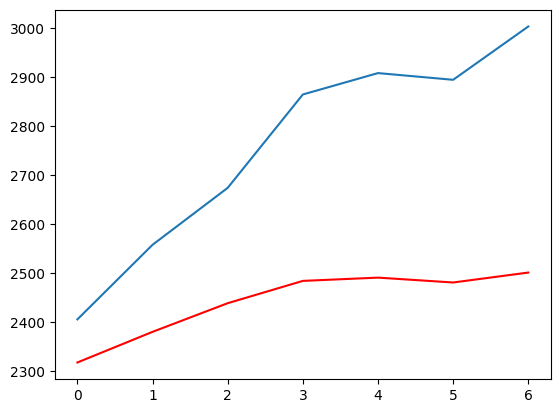

In [ ]:
# plot results
plt.plot(new_test)
plt.plot(new_predictions, color='red')